## In order to optimize our inventory, we would like to know which films will be rented next month and we are asked to create a model to predict it.

### 1- Create an SQL query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features

### Building 
Target variable_y : title
X values: inventory, customer_id, rent_month, rent_year, film_id, title

In [1]:
# First import the libraries
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()


········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)




In [3]:
#query = '''
#create or replace view monthly_rented_film as
#select f.film_id, f.title, rental_rate,date_format(convert(rental_date,date), '%m') as rental_month,
#date_format(convert(rental_date,date), '%Y') as rental_year, customer_id, i.inventory_id, store_id
#from film f
#join inventory i
#on f.film_id = i.film_id
#join rental r
#on i.inventory_id = r.inventory_id
        #'''

### 2- Read the data into a Pandas dataframe

In [4]:

df_film = pd.read_sql_query ('SELECT * FROM film', engine)
df_film

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2006-02-15 05:03:42
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2006-02-15 05:03:42
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2006-02-15 05:03:42
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2006-02-15 05:03:42


### 3- Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables

In [5]:
df_film['title'].value_counts()

HARPER DYING         1
VICTORY ACADEMY      1
HAUNTING PIANIST     1
CONSPIRACY SPIRIT    1
WITCHES PANIC        1
                    ..
UNITED PILOT         1
JEKYLL FROGMEN       1
FIGHT JAWBREAKER     1
HEAVENLY GUN         1
BANG KWAI            1
Name: title, Length: 1000, dtype: int64

In [6]:
df_film.shape

(1000, 13)

In [7]:
df_film.dtypes

film_id                          int64
title                           object
description                     object
release_year                     int64
language_id                      int64
original_language_id            object
rental_duration                  int64
rental_rate                    float64
length                           int64
replacement_cost               float64
rating                          object
special_features                object
last_update             datetime64[ns]
dtype: object

In [8]:
df_film.describe()

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
count,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2006.0,1.0,4.985000,2.980000,115.272000,19.984000
std,288.819436,0.0,0.0,1.411654,1.646393,40.426332,6.050833
min,1.000000,2006.0,1.0,3.000000,0.990000,46.000000,9.990000
25%,250.750000,2006.0,1.0,4.000000,0.990000,80.000000,14.990000
50%,500.500000,2006.0,1.0,5.000000,2.990000,114.000000,19.990000
75%,750.250000,2006.0,1.0,6.000000,4.990000,149.250000,24.990000
max,1000.000000,2006.0,1.0,7.000000,4.990000,185.000000,29.990000


In [9]:
df_film.isna().sum()

film_id                    0
title                      0
description                0
release_year               0
language_id                0
original_language_id    1000
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
last_update                0
dtype: int64

### 4- Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable

,title,last_month_rented
0,ACADEMY DINOSAUR,0
1,ACE GOLDFINGER,1
2,ADAPTATION HOLES,0
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1
...,...,...
995,YOUNG LANGUAGE,0
996,YOUTH KICK,0
997,ZHIVAGO CORE,1
998,ZOOLANDER FICTION,0


In [11]:
query_3 = '''
WITH cte1 as
(select distinct(title),
case
when title in
(select title from monthly_film
where rental_month = 2 and rental_year = 2006) then true
else false
end as last_month_rented
from film)

SELECT * 
FROM film f
JOIN cte1 c1
ON f.title = c1.title
'''
df3 = pd.read_sql_query(query_3, engine)
df3

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,title,last_month_rented
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,ACADEMY DINOSAUR,0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42,ACE GOLDFINGER,1
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42,ADAPTATION HOLES,0
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42,AFFAIR PREJUDICE,1
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42,AFRICAN EGG,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2006-02-15 05:03:42,YOUNG LANGUAGE,0
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2006-02-15 05:03:42,YOUTH KICK,0
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2006-02-15 05:03:42,ZHIVAGO CORE,1
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2006-02-15 05:03:42,ZOOLANDER FICTION,0


In [12]:
df3 = df3.drop(['title','description', 'language_id','original_language_id','replacement_cost','special_features', 'last_update'], axis =1)
df3

,film_id,release_year,rental_duration,rental_rate,length,rating,last_month_rented
0,1,2006,6,0.99,86,PG,0
1,2,2006,3,4.99,48,G,1
2,3,2006,7,2.99,50,NC-17,0
3,4,2006,5,2.99,117,G,1
4,5,2006,6,2.99,130,G,1
...,...,...,...,...,...,...,...
995,996,2006,6,0.99,183,G,0
996,997,2006,4,0.99,179,NC-17,0
997,998,2006,6,0.99,105,NC-17,1
998,999,2006,5,2.99,101,R,0


In [13]:
df3['release_year'] = df3['release_year'].astype('object')
df3['last_month_rented'] = df3['last_month_rented'].astype('object')


<ipython-input-13-3849df2f018e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['release_year'] = df3['release_year'].astype('object')
<ipython-input-13-3849df2f018e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['last_month_rented'] = df3['last_month_rented'].astype('object')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


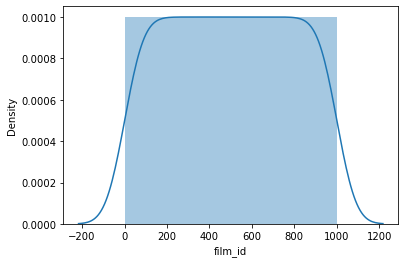

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


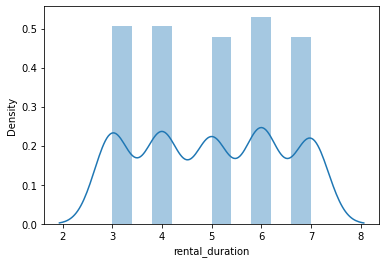

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


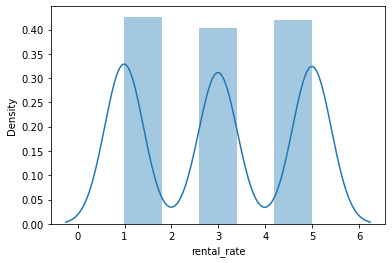

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


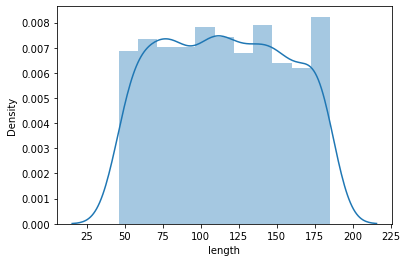

In [14]:
for column in df3.select_dtypes(np.number).columns:
    sns.distplot(df3[column])
    plt.show()

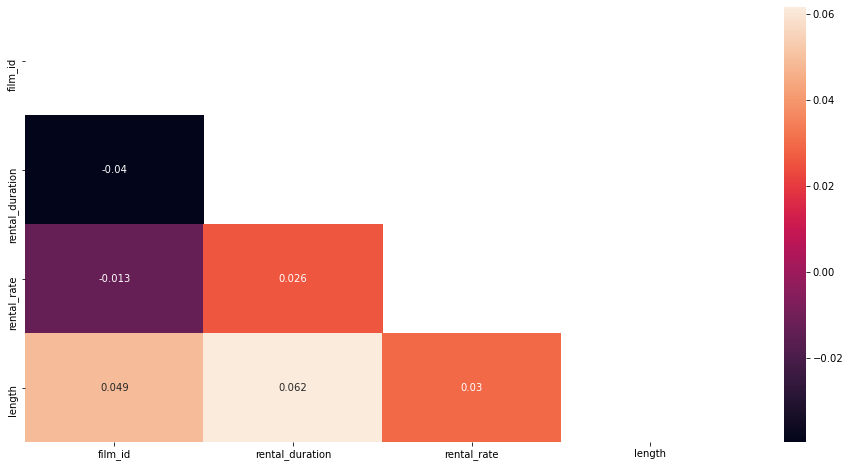

In [15]:
corr_data_3 = df3
correlations_matrix = corr_data_3.corr() 

mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

### 5- Create a logistic regression model to predict this variable from the cleaned data

In [16]:
X = df3.drop('last_month_rented', axis=1)
y = df3['last_month_rented']


In [17]:
X = pd.get_dummies(df3, drop_first=True)
X

,film_id,rental_duration,rental_rate,length,rating_NC-17,rating_PG,rating_PG-13,rating_R,last_month_rented_1
0,1,6,0.99,86,0,1,0,0,0
1,2,3,4.99,48,0,0,0,0,1
2,3,7,2.99,50,1,0,0,0,0
3,4,5,2.99,117,0,0,0,0,1
4,5,6,2.99,130,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
995,996,6,0.99,183,0,0,0,0,0
996,997,4,0.99,179,1,0,0,0,0
997,998,6,0.99,105,1,0,0,0,1
998,999,5,2.99,101,0,0,0,1,0


In [18]:
# Train Test Split!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_test

,film_id,rental_duration,rental_rate,length,rating_NC-17,rating_PG,rating_PG-13,rating_R,last_month_rented_1
521,522,4,2.99,137,1,0,0,0,0
737,738,3,0.99,178,0,0,1,0,0
740,741,7,0.99,81,1,0,0,0,0
660,661,5,4.99,157,0,0,1,0,0
411,412,6,4.99,102,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
408,409,3,4.99,59,0,0,0,0,0
332,333,7,2.99,126,0,0,0,1,0
208,209,6,2.99,99,1,0,0,0,0
613,614,5,4.99,178,0,0,1,0,1


In [20]:
y_test

521    0
737    0
740    0
660    0
411    0
      ..
408    0
332    0
208    0
613    1
78     1
Name: last_month_rented, Length: 200, dtype: object

### 6- Evaluate the results (calculate the score of the model)

In [22]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'

In [ ]:
classification.score(X_test, y_test)

In [ ]:
predictions = classification.predict(X_test)

pd.Series(predictions).value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')